In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv("Mall_Customers.csv")
print(dataset.head())
#selecting only 2 columns to visualise clustering in 2D graph in this scenario. We can choose any no of columns
X=dataset.iloc[:,3:5].values
print(X)

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [

# Using Dendrogram to find optimal number of cluster

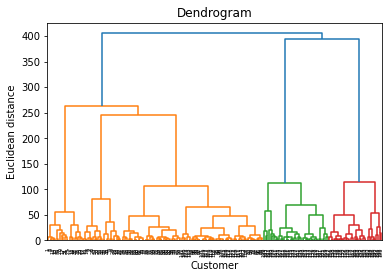

In [4]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customer")
plt.ylabel("Euclidean distance")
plt.show()
# Calculate vertical distance between two subsequent horizontal line.
# Draw a horizontal(cut-off) line where Max vertical distance is found and no of cluster is calculated on how many vertical line it intercept 

# Training Hierarchical clustering model on the dataset

In [5]:
from sklearn.cluster import AgglomerativeClustering
# In abovr graph, cut-off line interacts between orange and red, some cluster size is 5
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(X)

In [6]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


# Visualising the cluster

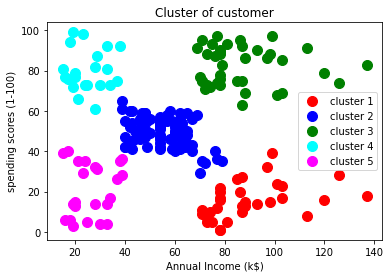

In [7]:
# We are selecting only Annual Income(X axis) & Spending Score(Y axis)]
# Selecting row that matches cluster 0. X[y_kmeans==0,0]-X[selected_row, column(axis)]
plt.scatter(X[y_hc==0,0],X[y_hc==0,1], s=100, c='red', label="cluster 1")# select customer with value 0
plt.scatter(X[y_hc==1,0],X[y_hc==1,1], s=100, c='blue', label="cluster 2")
plt.scatter(X[y_hc==2,0],X[y_hc==2,1], s=100, c='green', label="cluster 3")
plt.scatter(X[y_hc==3,0],X[y_hc==3,1], s=100, c='cyan', label="cluster 4")
plt.scatter(X[y_hc==4,0],X[y_hc==4,1], s=100, c='magenta', label="cluster 5")
plt.title("Cluster of customer")
plt.xlabel("Annual Income (k$)")
plt.ylabel("spending scores (1-100)")
plt.legend()
plt.show()